##### movies-q2 notebook
***

<h1>Question 2 - Which studios do our data indicate are the highest - earning?</h1>

    1. Which are the top studios in 2018? ...2016-18?
    2. Are any studios trending one way or another?
    3. What are their top grossing titles from these studios?

### importing required libraries

In [1]:
import os # for setting the current directory

import numpy as np
import pandas as pd

import sqlite3
import pandasql

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# setting the current working directory
os.chdir("c:/users/jd/flatiron/project01/dsc-mod-1-project-v2-1-online-ds-ft-120919/")

# printing the current working directory
print(os.getcwd())

c:\users\jd\flatiron\project01\dsc-mod-1-project-v2-1-online-ds-ft-120919


### Connecting to sqlite database

In [3]:
# connecting to sql movies_db data source and instantiate a cursor
conn = sqlite3.connect("movies_db.sqlite")
cur = conn.cursor()

### listing the sqlite table names

In [4]:
# getting names of all tables in the sql database
sql_tables = conn.execute("select name from sqlite_master where type='table';")

# assigning table names to a variable as a list for future iteration
table_list = list(map(lambda x: x[0], sql_tables.fetchall()))
table_list

['clean_bom_tbl', 'clean_tn_tbl', 'studio_titles_tbl', 'clean_imdb_title_tbl']

***

<h2 align='center'><font color='chocolate'>Highest grossing studios</font></h2>

We can find studio, title, and worldwide gross in the `clean_bom_tbl`.

### Query sqlite3 to view `clean_bom_tbl` by studio, in order of highest total gross, from 2016-2018.

In [5]:
# connecting to the required table
cur.execute('''SELECT studio, count(title) as num_Titles, sum(Total_gross) as sum_Gross
                    FROM clean_bom_tbl
                    WHERE year BETWEEN 2016 AND 2018
                    GROUP BY studio
                    ORDER BY Total_gross DESC
                    LIMIT 10
                    ;''')

studio_title_count_df = pd.DataFrame(cur.fetchall())
studio_title_count_df.columns = [x[0] for x in cur.description]

print(studio_title_count_df.shape)
studio_title_count_df.sort_values(by='sum_Gross', ascending=False)

(10, 3)


,studio,num_Titles,sum_Gross
0,BV,31,1.925650e+10
2,WB,42,1.281100e+10
1,Uni.,50,1.227112e+10
4,Fox,41,1.051733e+10
5,Sony,46,7.818804e+09
8,Par.,35,5.274600e+09
9,WB (NL),18,3.372700e+09
6,LG/S,17,2.018230e+09
3,HC,1,8.703000e+08
7,FR,8,3.943438e+08


In [6]:
# cleaning those titles using the df.apply() function on `studio` column 
studio_title_count_df['studio'] = studio_title_count_df[
    'studio'].apply(lambda x : x.strip().lower(
).replace(".", "").replace("\(", "").replace("\)", "").replace("\/", ""))

studio_title_count_df.studio

0         bv
1        uni
2         wb
3         hc
4        fox
5       sony
6       lg/s
7         fr
8        par
9    wb (nl)
Name: studio, dtype: object

doing the same for 2018.

In [7]:
# connect to the required table
cur.execute('''SELECT studio, count(title) as num_Titles, sum(Total_gross) as sum_Gross
                    FROM clean_bom_tbl
                    WHERE year == 2018
                    GROUP BY studio
                    ORDER BY Total_gross DESC
                    LIMIT 10
                    ;''')

studio_title_count_2018_df = pd.DataFrame(cur.fetchall())
studio_title_count_2018_df.columns = [x[0] for x in cur.description]

print(studio_title_count_2018_df.shape)
studio_title_count_2018_df.sort_values(by='sum_Gross', ascending=False)

(10, 3)


,studio,num_Titles,sum_Gross
5,BV,10,5.667401e+09
1,WB,17,5.494300e+09
0,Uni.,21,4.900200e+09
3,Sony,15,2.615626e+09
2,Fox,11,2.583500e+09
4,Par.,8,1.886200e+09
7,WB (NL),5,1.055300e+09
8,LGF,12,8.033914e+08
6,WGUSA,8,7.957380e+08
9,MGM,2,2.140000e+08


In [8]:
# cleaning these studio names, as above

studio_title_count_2018_df['studio'] = studio_title_count_2018_df[
    'studio'].apply(lambda x : x.strip().lower(
).replace(".", "").replace("\(", "").replace("\)", "").replace("\/", ""))

studio_title_count_2018_df.studio

0        uni
1         wb
2        fox
3       sony
4        par
5         bv
6      wgusa
7    wb (nl)
8        lgf
9        mgm
Name: studio, dtype: object

***

<h2 align='center'><font color='coral'>Visual EDA: Top Studios</font></h2>

### Plot the Data from the two dataframes as on a single figure.

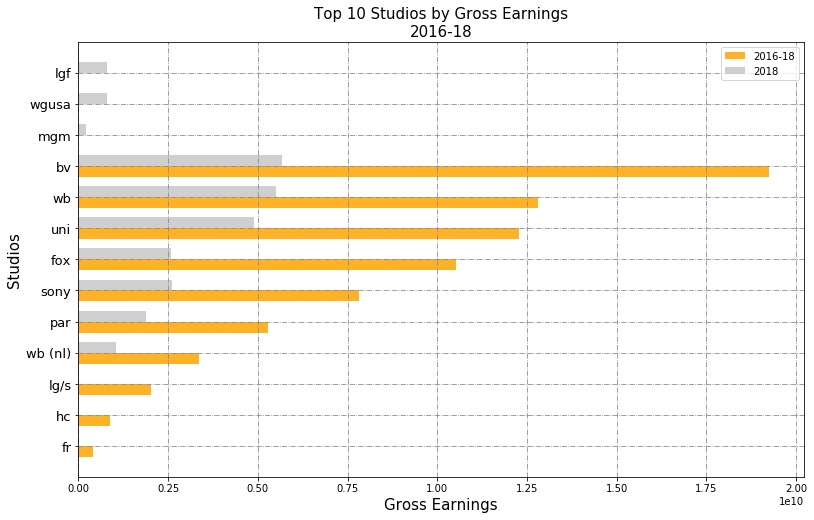

In [9]:
# creating variables for our tables
df_sorted = studio_title_count_df.sort_values(by='sum_Gross',ascending=True)
df_sort_18 = studio_title_count_2018_df.sort_values(by='sum_Gross',ascending=True)

# defining axes
x1 = df_sorted.studio
y1 = df_sorted.sum_Gross
x2 = df_sort_18.studio
y2 = df_sort_18.sum_Gross

# creating the figure
plt.figure(figsize=(13,8))
width = 0.35       # the width of the bars
plt.grid(b=True, which='major', color='#888888', linestyle='-.')
plt.barh(x1, y1, -width, color='orange', align='edge', alpha=.85,  label = '2016-18')
plt.barh(x2, y2, +width, color='silver', align='edge', alpha=.75,  label = '2018')

# defining labels
plt.ylabel('Studios', fontsize=15)
plt.yticks(fontsize=13)
plt.xlabel('Gross Earnings', fontsize=15)
plt.title("Top 10 Studios by Gross Earnings\n2016-18", fontsize=15)

plt.legend()
plt.show()

The top 6 studios of 2018, by gross, were also the top 6 for 2016-2018.

<h2 align='center'><font color='coral'>Top Titles from Highest grossing studios</font></h2>

### Getting a dataframe with titles (not just counts)


In [10]:
# connecting to the required table
cur.execute('''SELECT studio, title, Total_gross
                    FROM clean_bom_tbl
                    WHERE year BETWEEN 2016 AND 2018
                    ORDER BY Total_gross DESC
                    ;''')

studio_titles_df = pd.DataFrame(cur.fetchall())
studio_titles_df.columns = [x[0] for x in cur.description]

### Getting studio names

In [11]:
# must go back to clean these in sqlite3
studio_titles_df['studio'] = studio_titles_df[
    'studio'].apply(lambda x : x.strip().lower(
).replace(".", "").replace("\(", "").replace("\)", "").replace("\/", ""))

print(studio_titles_df.shape)
studio_titles_df.head(2)

(1064, 3)


,studio,title,Total_gross
0,bv,Black Panther,1.347000e+09
1,bv,Star Wars: The Last Jedi,1.332600e+09


In [12]:
# getting the studio names

# storing dtype before operation 
dtype_before = type(studio_title_count_df["studio"]) 
  
# converting to list 
studio_list = studio_title_count_df["studio"].head(6).tolist() 
  
# storing dtype after operation 
dtype_after = type(studio_list) 
  
# printing dtype 
print("Data type before converting = {}\nData type after converting = {}"
      .format(dtype_before, dtype_after)) 
  
# displaying list 
studio_list 

Data type before converting = <class 'pandas.core.series.Series'>
Data type after converting = <class 'list'>


['bv', 'uni', 'wb', 'hc', 'fox', 'sony']

### Slice dataframes for the top-6 studios from the 2016-18 dataframe, to view their top titles.

In [13]:
# test one
df = studio_titles_df[studio_titles_df['studio'] == 'uni'].head(10)
df

,studio,title,Total_gross
2,uni,Jurassic World: Fallen Kingdom,1.309500e+09
8,uni,Despicable Me 3,1.034800e+09
15,uni,The Secret Life of Pets,8.755000e+08
35,uni,Sing,6.342000e+08
51,uni,Dr. Seuss' The Grinch (2018),5.116000e+08
57,uni,Warcraft,4.337000e+08
59,uni,Jason Bourne,4.155000e+08
61,uni,The Mummy (2017),4.092000e+08
63,uni,Mamma Mia! Here We Go Again,3.950000e+08
68,uni,Fifty Shades Darker,3.816000e+08



------------------------------------------------------------------
<h2 align='center'><font color='coral'>Visualization</font></h2>

#### Visualizing top-10 titles from each of the top studios

In [14]:
# entering studios argument as a list of one or more
def get_studio_10(studios):
    for target in studios:
        df = studio_titles_df[studio_titles_df['studio'] == target].head(10)
        display(df)

In [15]:
# using a loop
get_studio_10(['bv'])

,studio,title,Total_gross
0,bv,Black Panther,1.347000e+09
1,bv,Star Wars: The Last Jedi,1.332600e+09
3,bv,Beauty and the Beast (2017),1.263500e+09
4,bv,Incredibles 2,1.242800e+09
5,bv,Captain America: Civil War,1.153300e+09
7,bv,Rogue One: A Star Wars Story,1.056100e+09
9,bv,Finding Dory,1.028600e+09
10,bv,Zootopia,1.023800e+09
11,bv,The Jungle Book (2016),9.665000e+08
18,bv,Guardians of the Galaxy Vol. 2,8.637000e+08


In [16]:
def get_studio_10_barh(studios):
    for target in studios:
        df = studio_titles_df[studio_titles_df['studio'] == target].head(10)
        
        # defining axes
        x = df.title
        y = df.Total_gross

        # creating the figure
        plt.figure(figsize=(8, 5))
        width = 0.35       # the width of the bars
        plt.grid(b=True, which='minor', color='#888888', linestyle='--')
        plt.barh(x, y, -width, color='orange', align='edge', alpha=.85,  label = '2016-18')
        plt.ylim(plt.ylim()[::-1])

        # defining labels
        plt.ylabel('Titles', fontsize=15)
        plt.yticks(fontsize=13)
        plt.xlabel('Gross Earnings', fontsize=15)
        plt.title(f'Top 10 Titles from {target}, 2016-18', fontsize=15)

        plt.legend()
        plt.show()

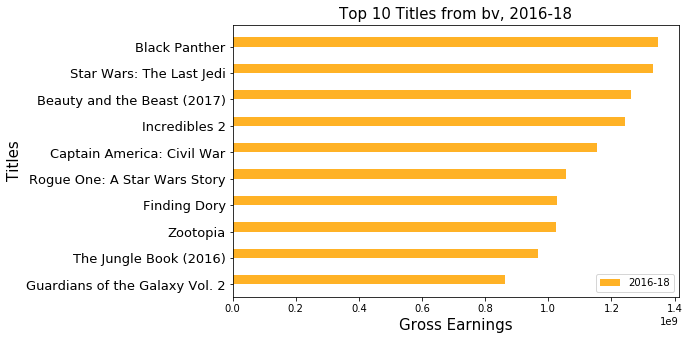

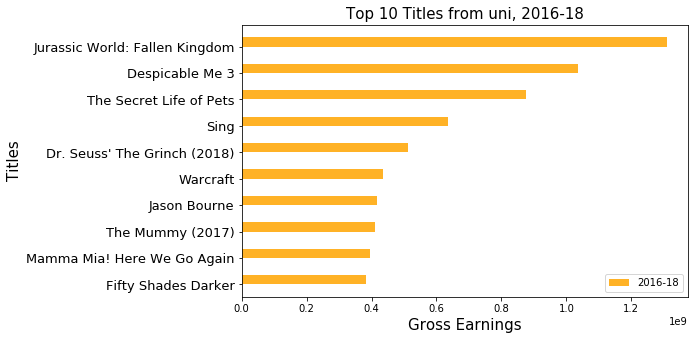

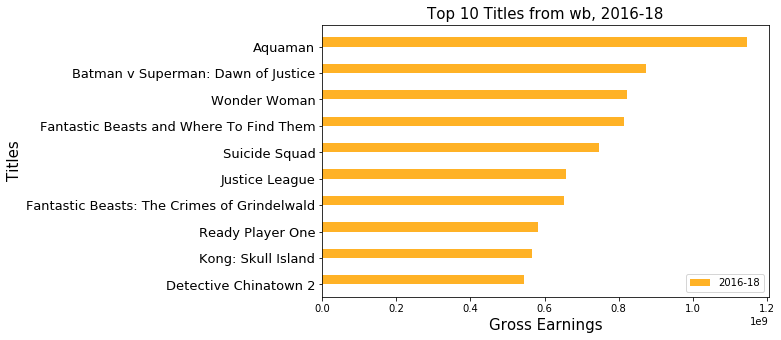

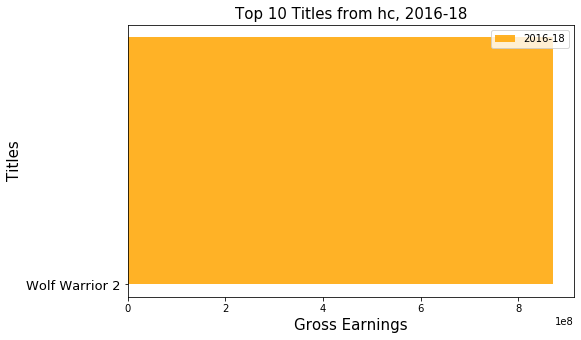

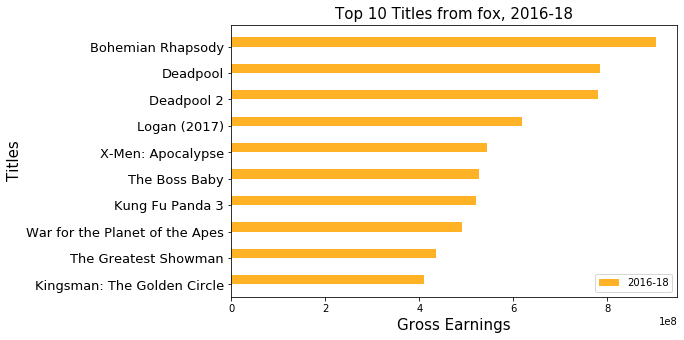

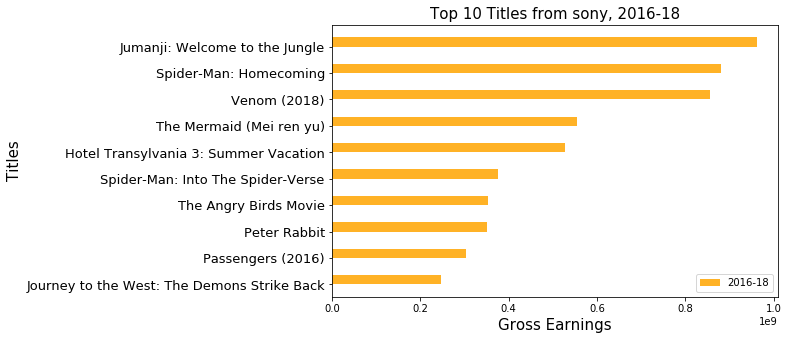

In [17]:
# using `studio_list` to view all studios
get_studio_10_barh(studio_list)

***

### Adding `studio_titles_df` to sqlite

Saving this useful table for genre exploration

In [18]:
# add the new df as a table to the sqlite database
studio_titles_df.to_sql('studio_titles_tbl', conn, if_exists='replace')

### list the sqlite table names

In [19]:
# viewing names of all tables in the sql database to verify operation
conn.execute("select name from sqlite_master where type='table';").fetchall()

[('clean_bom_tbl',),
 ('clean_tn_tbl',),
 ('clean_imdb_title_tbl',),
 ('studio_titles_tbl',)]

In [20]:
cur.close()
conn.close()

* We observe Buena Vista far ahead of the pack, in recent years. Much of this is owed to action adventure fantasy sequels, from the Marvel Cinematic Universe and the Star Wars franchise. However, there are a couple of surprises, including the one-off, animated feature Zootopia.
* It is also of note that Sony makes the top-10. The company's second - highest grossing movie between 2016-2018 was produced under license by The Walt Disney Company's (BV) Marvel Studios.
* There are many enticing avenues to explore with additional data.